<div id="container" style="position:relative;">
<div style="float:left"><h1> Data Prep and Exploration</h1></div>



Data preparation and exploratory data analysis (EDA) are two processes that go hand in hand.

Before we can carry out any real meaningful analysis using data we must always go through the process of making sure our dataset is clean and fit for purpose. We can then begin exploring the data itself to build initial intuition about the trends contained within the data that could help us answer further questions or guide us other downstream tasks such as modeling. 

In this codealong we will go through the process of preparing and exploring a new dataset. Our aim is to build comfort using Pandas to clean data and develop a framework we can use whenever we need to clean data.  

### Dataset

We will be using a real world bank marketing dataset. The dataset contains information about customers who were contacted as part of a telephone marketing campaign trying to get customers to sign up for a term deposit product. The dataset also contains information about whether the customer has been contacted as part of the current marketing campaign or had been as part of a previous campaign. 

#### Data Dictionary

To help us with our analysis, take some time to study the data dictionary below. 

Demographic & client data:
- age (numeric)
- job (categorical)
- marital: marital status (categorical, note: 'divorced' means divorced or widowed)
- education (categorical)
- credit_in_default: has credit in default? (categorical)
- housing_loan: has housing loan? (categorical)
- personal_loan: has personal loan? (categorical)

Data about the calls from *this* campaign:
- last_contact_type: contact communication type (categorical)
- last_contact_month: last contact month of year (categorical)
- last_contact_day: last contact day of the week (categorical)
- last_contact_duration: last contact duration, in seconds (numeric)
- last_contact_duration_mins: last contact duration, in minutes (numeric)
- n_contacts_this_campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Data about calls from *previous* campaigns:
- n_contacts_prev_campaign: number of contacts performed before this campaign and for this client (numeric)
- prev_campaign_outcome: outcome of the previous marketing campaign (categorical)

Field of interest:
- registered: has the client registered for a term deposit?

### Question of interest

Imagine we work as a data analyst/scientist within the marketing department of the bank which owns this data. Our manger asks us to investigate the following: 

> How do customers who registered for the term deposit product differ from those who did not? This can be in terms of customer demographics or in terms of features of the current and prior marketing campaign. 


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("../data/raw/bank-marketing-data.csv")

In [17]:
data.head()

,;age;job;marital;education;credit_in_default;housing_loan;personal_loan;last_contact_type;last_contact_month;last_contact_day;last_contact_duration;n_contacts_this_campaign;days_since_last_contact;n_contacts_prev_campaign;prev_campaign_outcome;registered
0,0;38.0;student - Albufeira;divorced;unknown;no...
1,1;34.0;services - Mealhada;married;professiona...
2,2;43.0;housemaid - Vila Franca de Xira;;;unkno...
3,3;75.0;retired - Mirandela;married;basic.4y;no...
4,4;58.0;retired - Funchal;married;unknown;no;un...


In [18]:
data = pd.read_csv("../data/raw/bank-marketing-data.csv",
                   sep=";")
data.head()

,Unnamed: 0,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


In [19]:
# if we want to skip that existing index column and add our own upon reading
data = pd.read_csv("../data/raw/bank-marketing-data.csv",
                   sep=";",
                   usecols=data.columns[1::]) # uses the data variable from before


In [20]:
data.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


If the first column is an index column we can keep it and eliminate the unnamed column, if not we can give it one

In [21]:
# to use the existing index column
data = pd.read_csv("../data/raw/bank-marketing-data.csv",
                   sep=";",
                   index_col=0) # the first col is an index

In [22]:
data.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


In [23]:
# sanity check the index as read
len(set(data.index))

11720

In [24]:
data.shape # same number of rows as unique index elements, good!

(11720, 16)

In [25]:
# another way to skip the whole index confusion
data = pd.read_csv("../data/raw/bank-marketing-data.csv",
                   sep=';')
# this has a new index and the old index as the unnamed column
data = data.drop(columns=["Unnamed: 0"])
data.head()

,age,job,marital,education,credit_in_default,housing_loan,personal_loan,last_contact_type,last_contact_month,last_contact_day,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign,prev_campaign_outcome,registered
0,38.0,student - Albufeira,divorced,unknown,no,no,no,cellular,may,tue,244.0,3,999,0,nonexistent,no
1,34.0,services - Mealhada,married,professional.course,no,no,no,cellular,may,mon,190.0,3,999,0,nonexistent,no
2,43.0,housemaid - Vila Franca de Xira,NaN,NaN,unknown,yes,yes,cellular,jul,thu,97.0,2,999,0,nonexistent,no
3,75.0,retired - Mirandela,married,basic.4y,no,no,no,cellular,oct,wed,113.0,2,999,0,nonexistent,no
4,58.0,retired - Funchal,married,unknown,no,unknown,unknown,telephone,may,tue,174.0,1,999,0,nonexistent,no


We now have tabular data, what might we want to know next?

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11132 non-null  float64
 1   job                       11027 non-null  object 
 2   marital                   10992 non-null  object 
 3   education                 11005 non-null  object 
 4   credit_in_default         11720 non-null  object 
 5   housing_loan              11720 non-null  object 
 6   personal_loan             11720 non-null  object 
 7   last_contact_type         11720 non-null  object 
 8   last_contact_month        11720 non-null  object 
 9   last_contact_day          11720 non-null  object 
 10  last_contact_duration     8841 non-null   float64
 11  n_contacts_this_campaign  11720 non-null  int64  
 12  days_since_last_contact   11720 non-null  int64  
 13  n_contacts_prev_campaign  11720 non-null  int64  
 14  prev_c

In [27]:
# we note that age, last_contact_dur, n_contacts are numbers, the rest are likely strings
# there are lots of missing values

In [28]:
# how to count up missing values?
data.isna().sum()

age                          588
job                          693
marital                      728
education                    715
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2879
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
dtype: int64

In [29]:
data.head(3).tail(1).T

,2
age,43.0
job,housemaid - Vila Franca de Xira
marital,NaN
education,NaN
credit_in_default,unknown
housing_loan,yes
personal_loan,yes
last_contact_type,cellular
last_contact_month,jul
last_contact_day,thu


### Data Cleaning

The bank has provided us with this snapshot of demographic and campaign data related to the term deposit product. First, let's read in the data and take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

In [30]:
# let's start our cleaning with that messed-up job column
# seems to be really "Job - Location" we want --> "Job" "Location"
# let's use the string accessor series.str.DO_SOMETHING
split_job = data["job"].str.split(" - ")
split_job # how to get this version back into our dataframe

0                          [student, Albufeira]
1                          [services, Mealhada]
2              [housemaid, Vila Franca de Xira]
3                          [retired, Mirandela]
4                            [retired, Funchal]
                          ...                  
11715                       [services, Funchal]
11716                      [blue-collar, Moura]
11717                      [housemaid, Valongo]
11718    [technician, Vila Nova de Santo André]
11719                    [blue-collar, Tondela]
Name: job, Length: 11720, dtype: object

In [31]:
# to split into dataframe and not a single list for every row
split_job = data["job"].str.split(" - ",expand=True) # expand means unpack the lists into a dataframe
split_job

,0,1
0,student,Albufeira
1,services,Mealhada
2,housemaid,Vila Franca de Xira
3,retired,Mirandela
4,retired,Funchal
...,...,...
11715,services,Funchal
11716,blue-collar,Moura
11717,housemaid,Valongo
11718,technician,Vila Nova de Santo André


In [32]:
split_job[split_job.isna()] # our nans were handled well

,0,1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
11715,NaN,NaN
11716,NaN,NaN
11717,NaN,NaN
11718,NaN,NaN


In [33]:
data[["job","location"]] = split_job

In [34]:
data.sample(5).T

,1215,3289,4124,10954,6197
age,31.0,49.0,41.0,43.0,43.0
job,admin.,unemployed,unemployed,technician,admin.
marital,single,married,single,married,married
education,university.degree,professional.course,basic.4y,professional.course,university.degree
credit_in_default,no,no,no,no,no
housing_loan,yes,no,no,no,yes
personal_loan,no,no,no,no,no
last_contact_type,cellular,cellular,cellular,cellular,cellular
last_contact_month,sep,jun,jun,may,jun
last_contact_day,fri,fri,mon,thu,tue


In [35]:
# how to spot other issues
data.describe() # summary stats on numerics

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign
count,11132.000000,8841.000000,11720.000000,11720.000000,11720.000000
mean,40.376662,349.068884,2.374403,908.414932,0.275768
std,11.703574,338.588752,2.406386,285.946506,0.656495
min,17.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,130.000000,1.000000,999.000000,0.000000
50%,38.000000,232.000000,2.000000,999.000000,0.000000
75%,48.000000,458.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,39.000000,999.000000,6.000000


In [36]:
# look at a histogram of the numerics
# first select numerics
numerics = data.select_dtypes("number") # use "object" to get non-numbers
numerics

,age,last_contact_duration,n_contacts_this_campaign,days_since_last_contact,n_contacts_prev_campaign
0,38.0,244.0,3,999,0
1,34.0,190.0,3,999,0
2,43.0,97.0,2,999,0
3,75.0,113.0,2,999,0
4,58.0,174.0,1,999,0
...,...,...,...,...,...
11715,39.0,241.0,5,999,0
11716,44.0,NaN,3,999,0
11717,NaN,115.0,1,999,0
11718,35.0,282.0,2,6,1


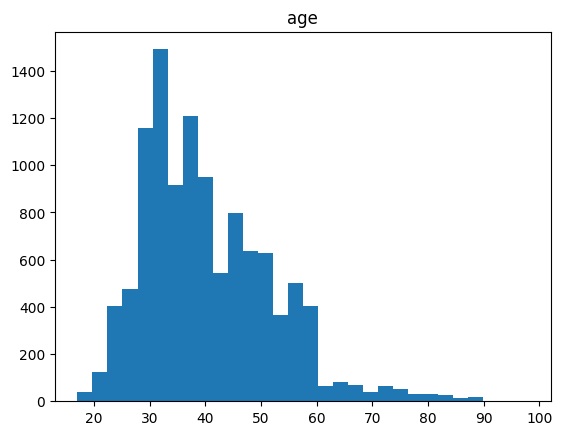

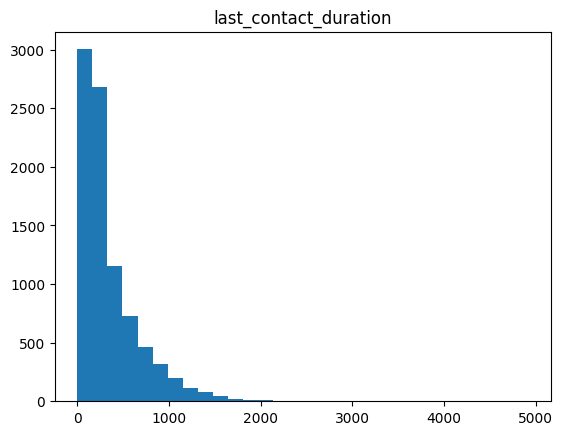

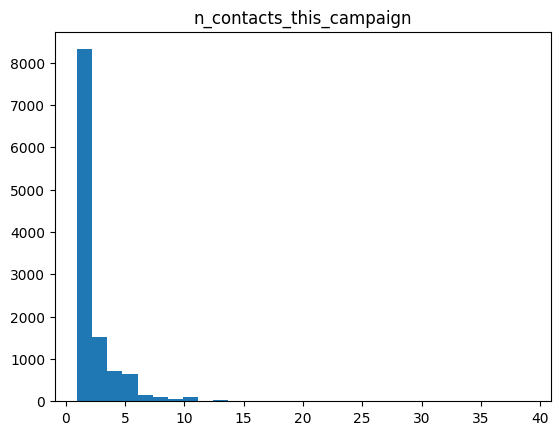

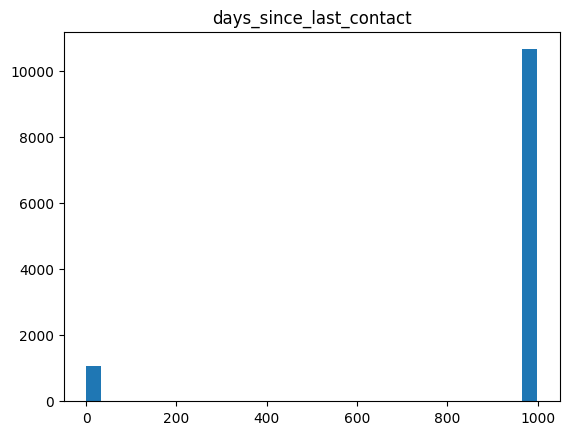

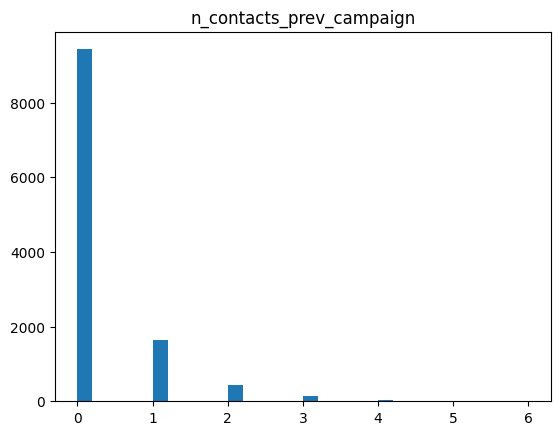

In [37]:
# make a basic histogram of each numeric feature
for column in numerics.columns:
    plt.figure()
    plt.hist(data[column],bins=30)
    plt.title(column)
    plt.show()

In [38]:
# Notes
# "days_since_last_contact has issue" == 999.00 in place of NAN
# other seem good = no impossible or highly suspicious values

<Axes: >

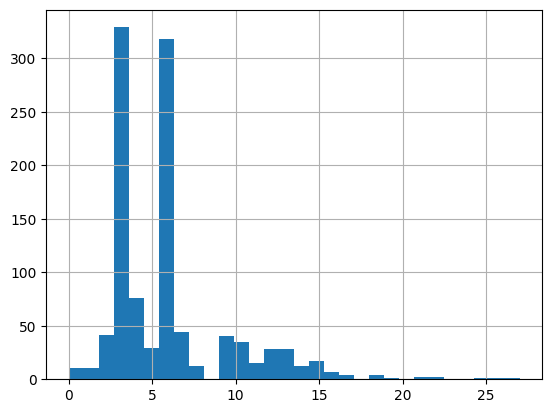

In [39]:
# what's going with with the other (non 999) values in that column
sel = data["days_since_last_contact"] < 999
data.loc[sel,"days_since_last_contact"].hist(bins=30)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       11132 non-null  float64
 1   job                       11027 non-null  object 
 2   marital                   10992 non-null  object 
 3   education                 11005 non-null  object 
 4   credit_in_default         11720 non-null  object 
 5   housing_loan              11720 non-null  object 
 6   personal_loan             11720 non-null  object 
 7   last_contact_type         11720 non-null  object 
 8   last_contact_month        11720 non-null  object 
 9   last_contact_day          11720 non-null  object 
 10  last_contact_duration     8841 non-null   float64
 11  n_contacts_this_campaign  11720 non-null  int64  
 12  days_since_last_contact   11720 non-null  int64  
 13  n_contacts_prev_campaign  11720 non-null  int64  
 14  prev_c

<Axes: xlabel='last_contact_type'>

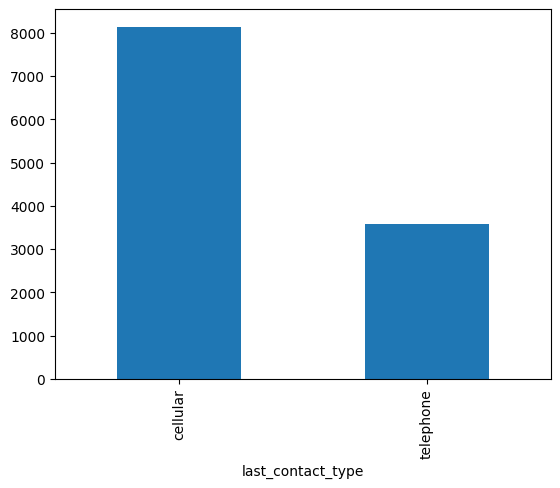

In [41]:
# helpful thing to look at the distribution of non-numeric
data["last_contact_type"].value_counts().plot(kind='bar')

In [42]:
non_numeric = data.select_dtypes("object")

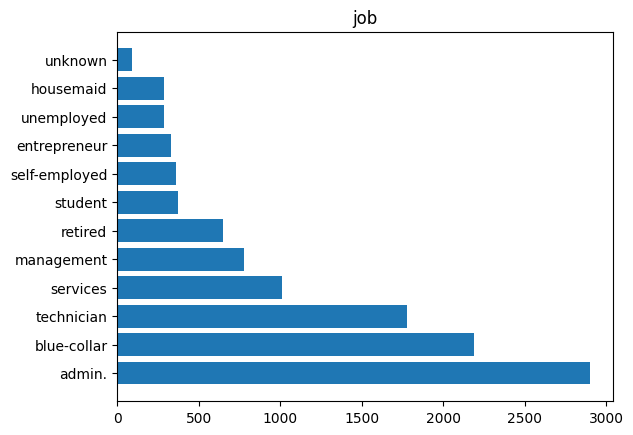

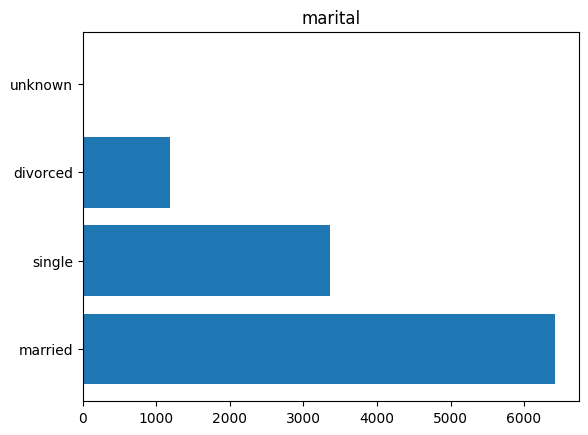

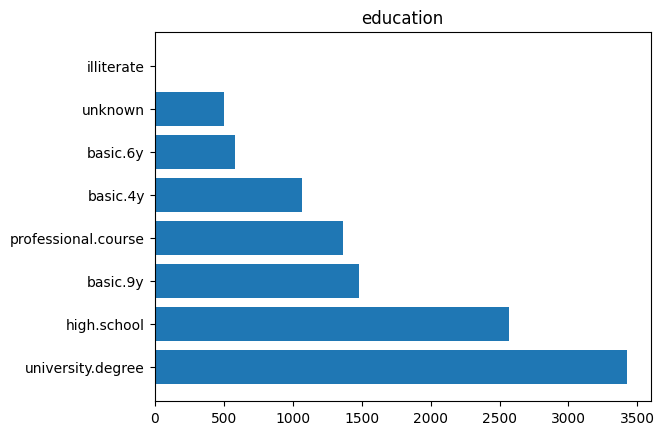

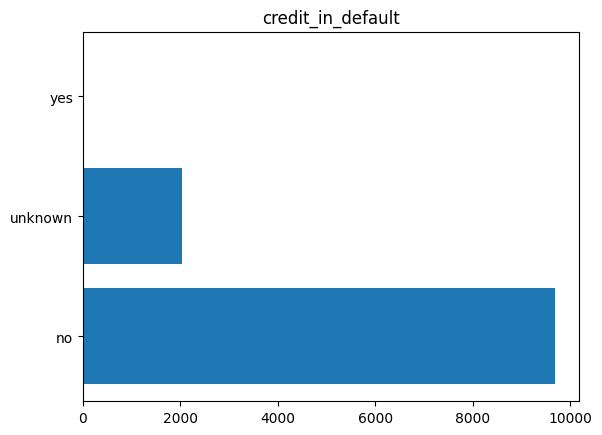

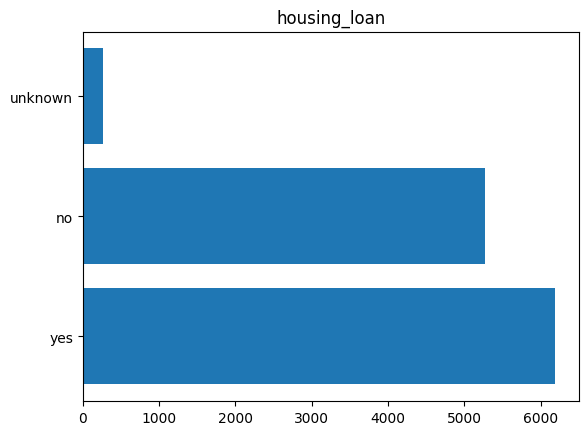

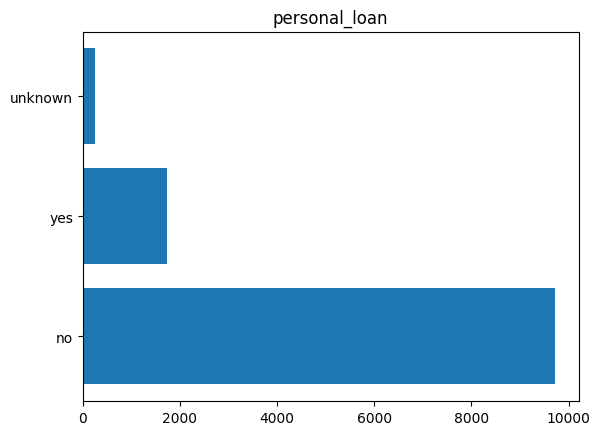

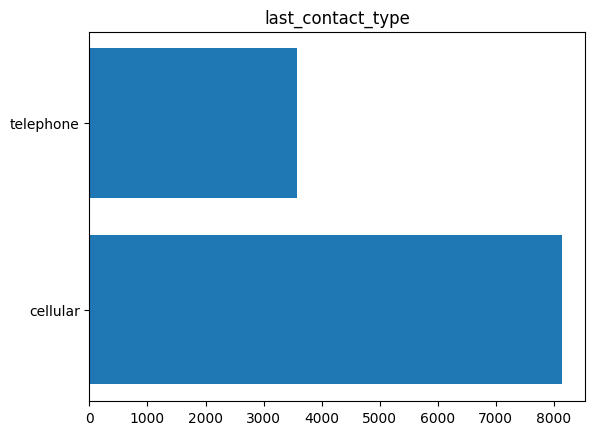

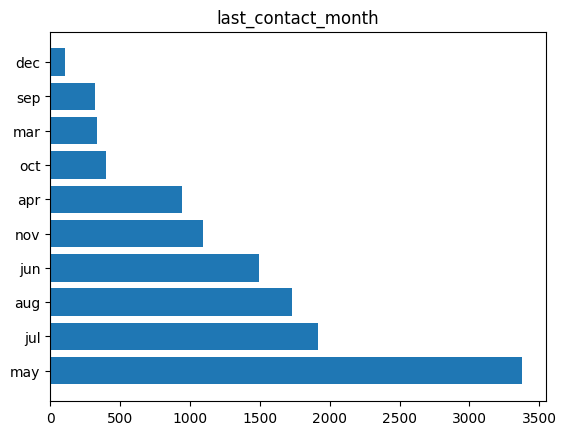

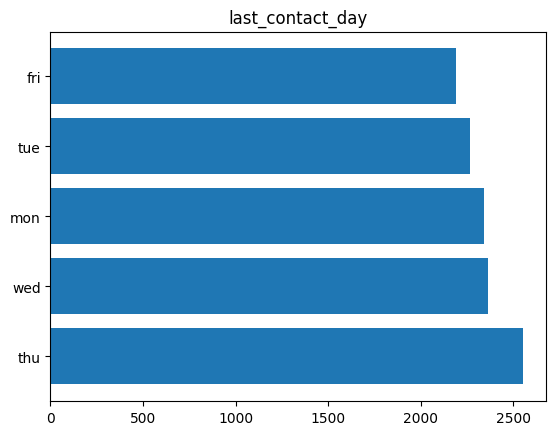

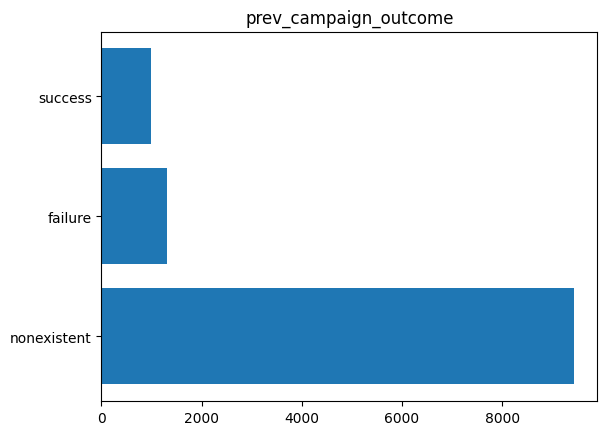

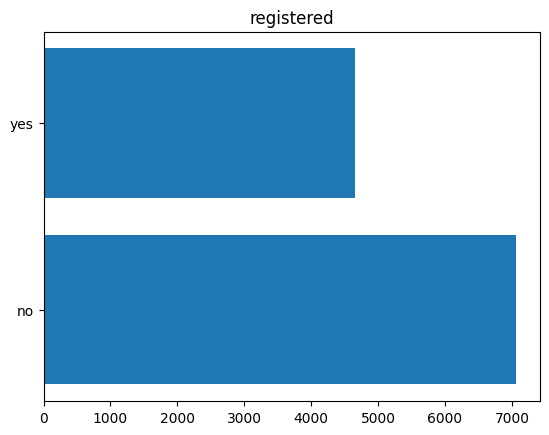

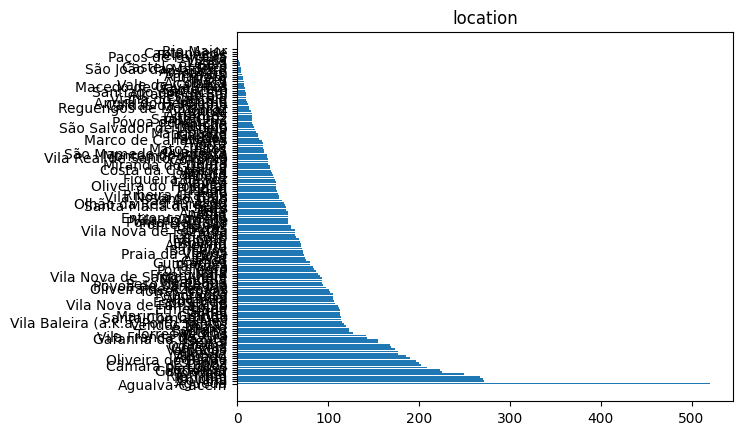

In [43]:
for column in non_numeric.columns:
    plt.figure()
    vc = data[column].value_counts()
    plt.barh(y=vc.index,width=vc.values)
    plt.title(column)
    plt.show()

<Axes: xlabel='location'>

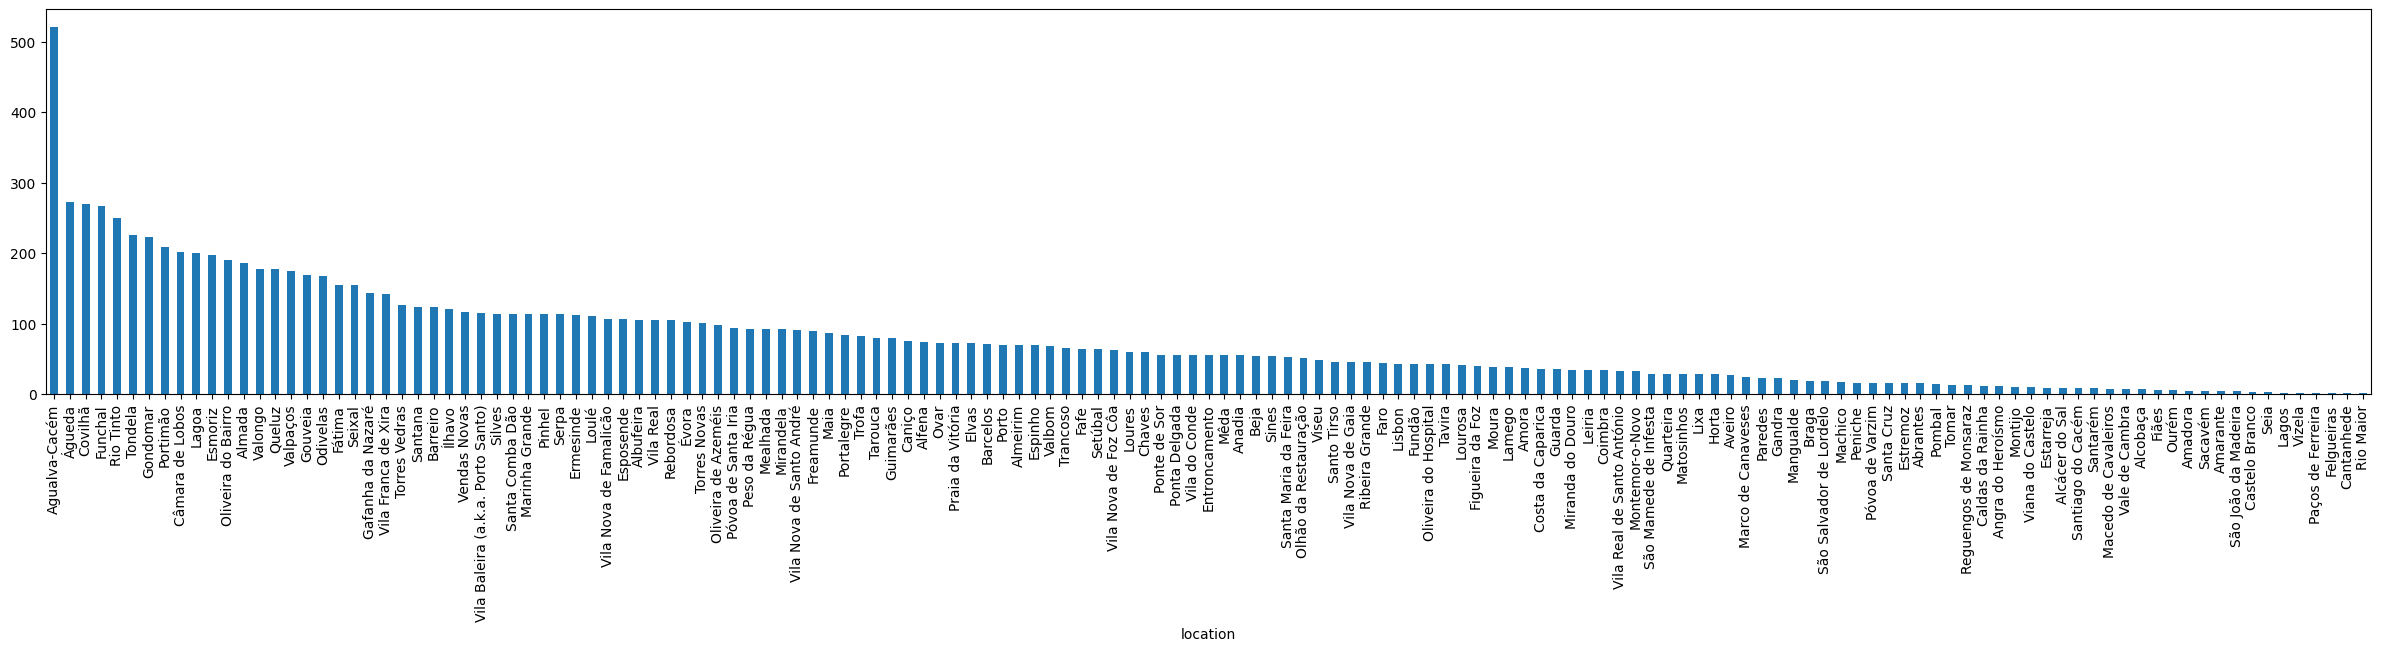

In [44]:
plt.figure(figsize=(30,5))
data["location"].value_counts().plot(kind='bar')

In [45]:
# imputation of Nans

In [46]:
# revisit nans
data.isna().sum()

age                          588
job                          693
marital                      728
education                    715
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2879
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
location                     693
dtype: int64

In [47]:
# what fraction of rows contain a nan of any type 
nan_df = data.isna() # all booleans
row_count_na = nan_df.T.sum() # could also use sum(axis=1) instead of .T
row_has_na = row_count_na > 0
total_nan_rows = row_has_na.sum()
total_rows = data.shape[0]
total_nan_rows / total_rows # all in one line (data.isna().T.sum() > 0).sum() / data.shape[0]

np.float64(0.40648464163822523)

In [48]:
# we can't just drop Nan's, we have to deal with them.  Sigh . . . 

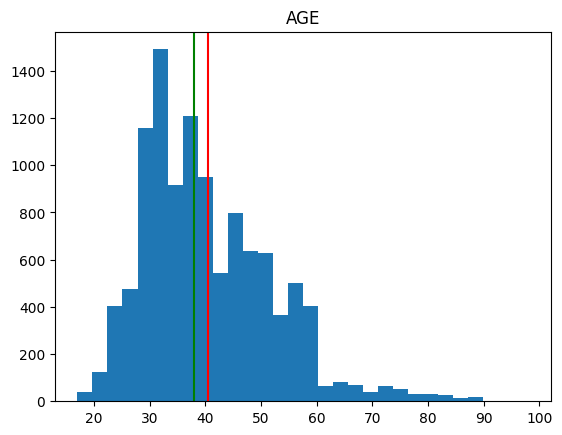

In [49]:
# first age
plt.figure()
plt.hist(data["age"],bins=30)
plt.axvline(data["age"].mean(),color='red') # add a vertical line
plt.axvline(data["age"].median(),color='green') # also median
plt.title("AGE")
plt.show()

In [50]:
# lets impute the median
median_value = data["age"].median() # automatically ignores nan
data["age"] = data["age"].fillna(median_value)

In [51]:
# another way
sel = data["age"].isna()
data.loc[sel,"age"] = median_value

In [52]:
data.isna().sum()

age                            0
job                          693
marital                      728
education                    715
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2879
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
location                     693
dtype: int64

<Axes: ylabel='job'>

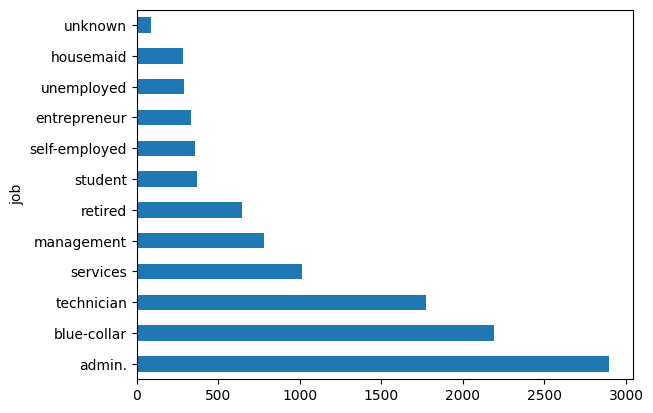

In [53]:
data.job.value_counts().plot(kind='barh')

In [54]:
# impute "unknown" for the nans, they seem the same in practice
data["job"] = data["job"].fillna("unknown")

In [55]:
data.isna().sum()

age                            0
job                            0
marital                      728
education                    715
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2879
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
location                     693
dtype: int64

<Axes: ylabel='marital'>

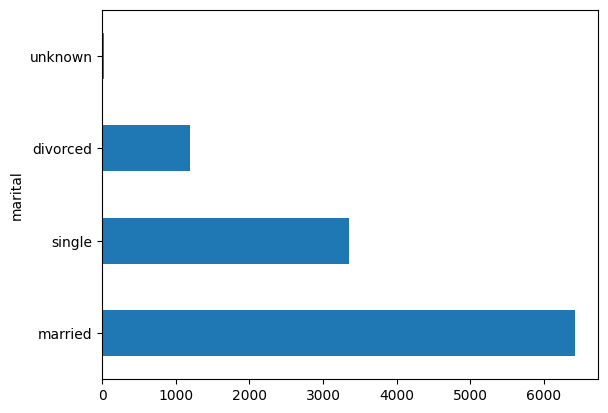

In [56]:
data["marital"].value_counts().plot(kind='barh')

In [57]:
# let's do the same
data["marital"] = data["marital"].fillna("unknown")

In [58]:
data["marital"].value_counts()

marital
married     6422
single      3357
divorced    1193
unknown      748
Name: count, dtype: int64

In [59]:
data["education"].value_counts()

education
university.degree      3424
high.school            2568
basic.9y               1482
professional.course    1363
basic.4y               1070
basic.6y                586
unknown                 505
illiterate                7
Name: count, dtype: int64

In [60]:
# let's do the same
data["education"] = data["education"].fillna("unknown")

In [61]:
data.isna().sum()

age                            0
job                            0
marital                        0
education                      0
credit_in_default              0
housing_loan                   0
personal_loan                  0
last_contact_type              0
last_contact_month             0
last_contact_day               0
last_contact_duration       2879
n_contacts_this_campaign       0
days_since_last_contact        0
n_contacts_prev_campaign       0
prev_campaign_outcome          0
registered                     0
location                     693
dtype: int64

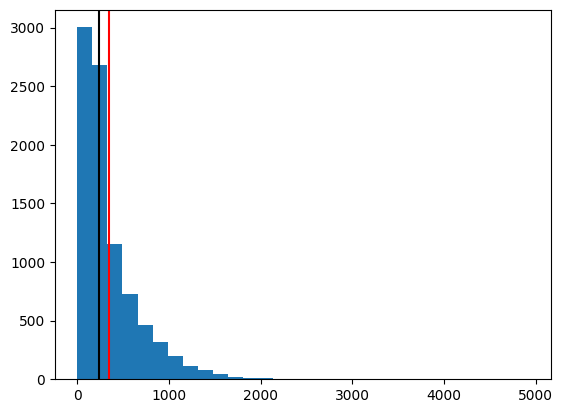

In [62]:
plt.figure()

plt.hist(data["last_contact_duration"],bins=30)
plt.axvline(data["last_contact_duration"].mean(),color='red')
plt.axvline(data["last_contact_duration"].median(),color='black')

In [63]:
# let's go with median again
data["last_contact_duration"] = data["last_contact_duration"].fillna(data["last_contact_duration"].median())

<BarContainer object of 147 artists>

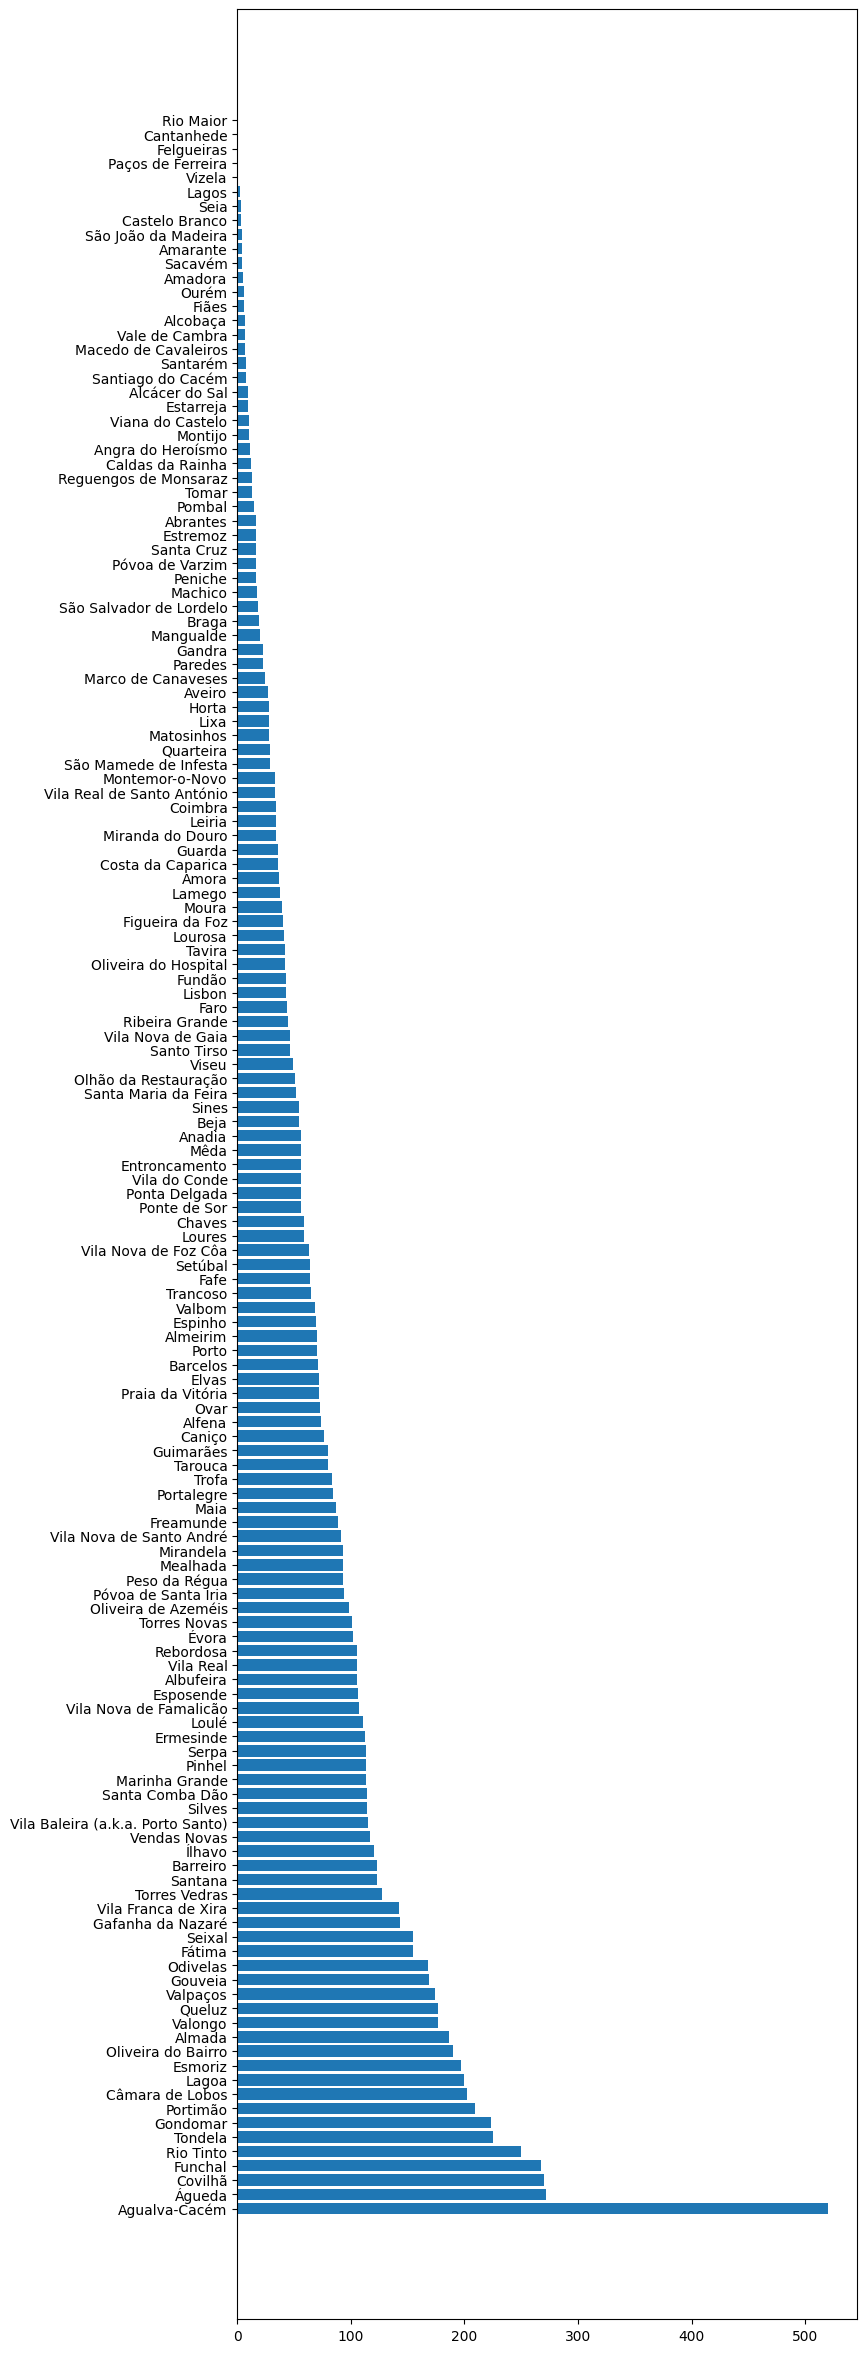

In [64]:
# location
plt.figure(figsize=(8,30))
vc = data.location.value_counts()
plt.barh(y=vc.index,width=vc.values)

In [65]:
data["location"].value_counts().shape

(147,)

In [66]:
# there is no obvious answer
# there isn't an obvious pattern to city, location, etc.
# adding an unknown would create the largest category
# addind the most frequent might over-inflate that value

In [67]:
# what if I wanted to be "fancy" and use the above data as the distribution
probs = data["location"].value_counts(normalize=True).values
names =  data["location"].value_counts().index
n_nans = data["location"].isna().sum()
random_empirical = np.random.choice(names,p=probs,replace=True,size=n_nans)
random_empirical

array(['Esposende', 'Câmara de Lobos', 'Tondela', 'Gondomar', 'Ovar',
       'Esposende', 'Câmara de Lobos', 'Funchal', 'Gondomar', 'Beja',
       'Guimarães', 'Agualva-Cacém', 'Gouveia', 'Valpaços', 'Esmoriz',
       'Agualva-Cacém', 'Alfena', 'Esmoriz', 'Fátima', 'Ílhavo',
       'Odivelas', 'Funchal', 'Valpaços', 'Gondomar', 'Santa Cruz',
       'Valongo', 'Esmoriz', 'Santo Tirso', 'Póvoa de Santa Iria',
       'Praia da Vitória', 'Seixal', 'Vila Real', 'Oliveira de Azeméis',
       'Oliveira de Azeméis', 'Rio Tinto', 'Trancoso', 'Esposende',
       'Covilhã', 'Loulé', 'Águeda', 'Valpaços', 'Lisbon',
       'Vila Nova de Famalicão', 'Agualva-Cacém', 'Portimão',
       'Agualva-Cacém', 'Ribeira Grande', 'Portimão',
       'Vila Baleira\xa0(a.k.a.\xa0Porto Santo)', 'Pinhel', 'Funchal',
       'Almada', 'Portimão', 'Silves', 'Vila Franca de Xira', 'Águeda',
       'Valbom', 'Fátima', 'Oliveira do Bairro', 'Gafanha da Nazaré',
       'Covilhã', 'Barreiro', 'Esmoriz', 'Agualva-Cacém', 'C

In [68]:
# to insert
sel = data["location"].isna()
data.loc[sel,"location"] = random_empirical

In [69]:
data.isna().sum()

age                         0
job                         0
marital                     0
education                   0
credit_in_default           0
housing_loan                0
personal_loan               0
last_contact_type           0
last_contact_month          0
last_contact_day            0
last_contact_duration       0
n_contacts_this_campaign    0
days_since_last_contact     0
n_contacts_prev_campaign    0
prev_campaign_outcome       0
registered                  0
location                    0
dtype: int64

### Exploratory Data Analysis (EDA)
Now that we've cleaned the data, let's do some analysis to address our original question: "What are the characteristics of the customers who register for the term deposit account?"

We will divide our data into categorical and numeric and proceed in this way.

In [70]:
data["registered"].value_counts()

registered
no     7061
yes    4659
Name: count, dtype: int64

In [71]:
registered = data["registered"] == "yes" # boolean selectors
not_registered = ~registered             # complement selector

Text(0.5, 1.0, 'Age for Reg vs. Not-reg')

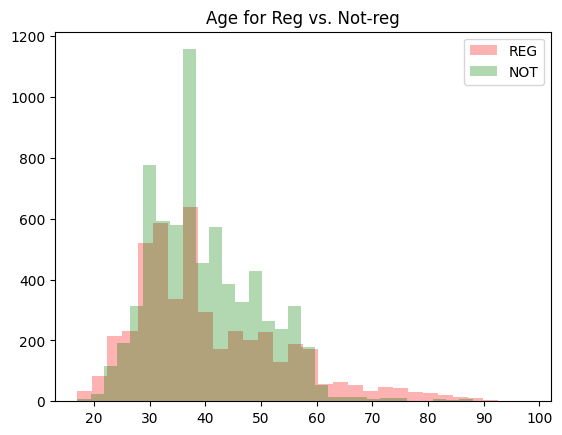

In [72]:
plt.figure()
plt.hist(data.loc[registered,"age"],bins=30,color='red',alpha=0.3,label="REG")
plt.hist(data.loc[not_registered,"age"],bins=30,color='green',alpha=0.3,label="NOT")
plt.legend()
plt.title("Age for Reg vs. Not-reg")

Text(0.5, 1.0, 'Age for Reg vs. Not-reg')

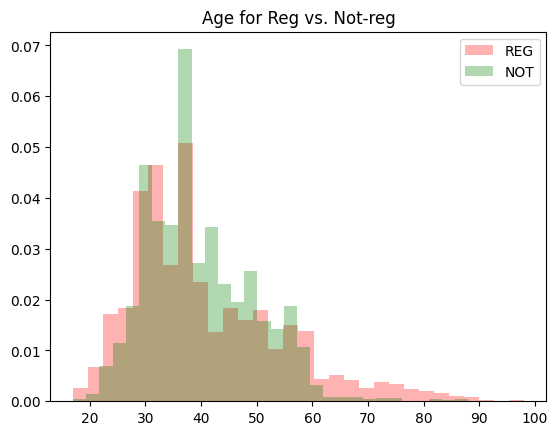

In [73]:
# same, but as probability mass function (PMF) or density
# the area of each histogram is one, so we can compare ratios
plt.figure()
plt.hist(data.loc[registered,"age"],bins=30,color='red',alpha=0.3,label="REG",density=True)
plt.hist(data.loc[not_registered,"age"],bins=30,color='green',alpha=0.3,label="NOT",density=True)
plt.legend()
plt.title("Age for Reg vs. Not-reg")

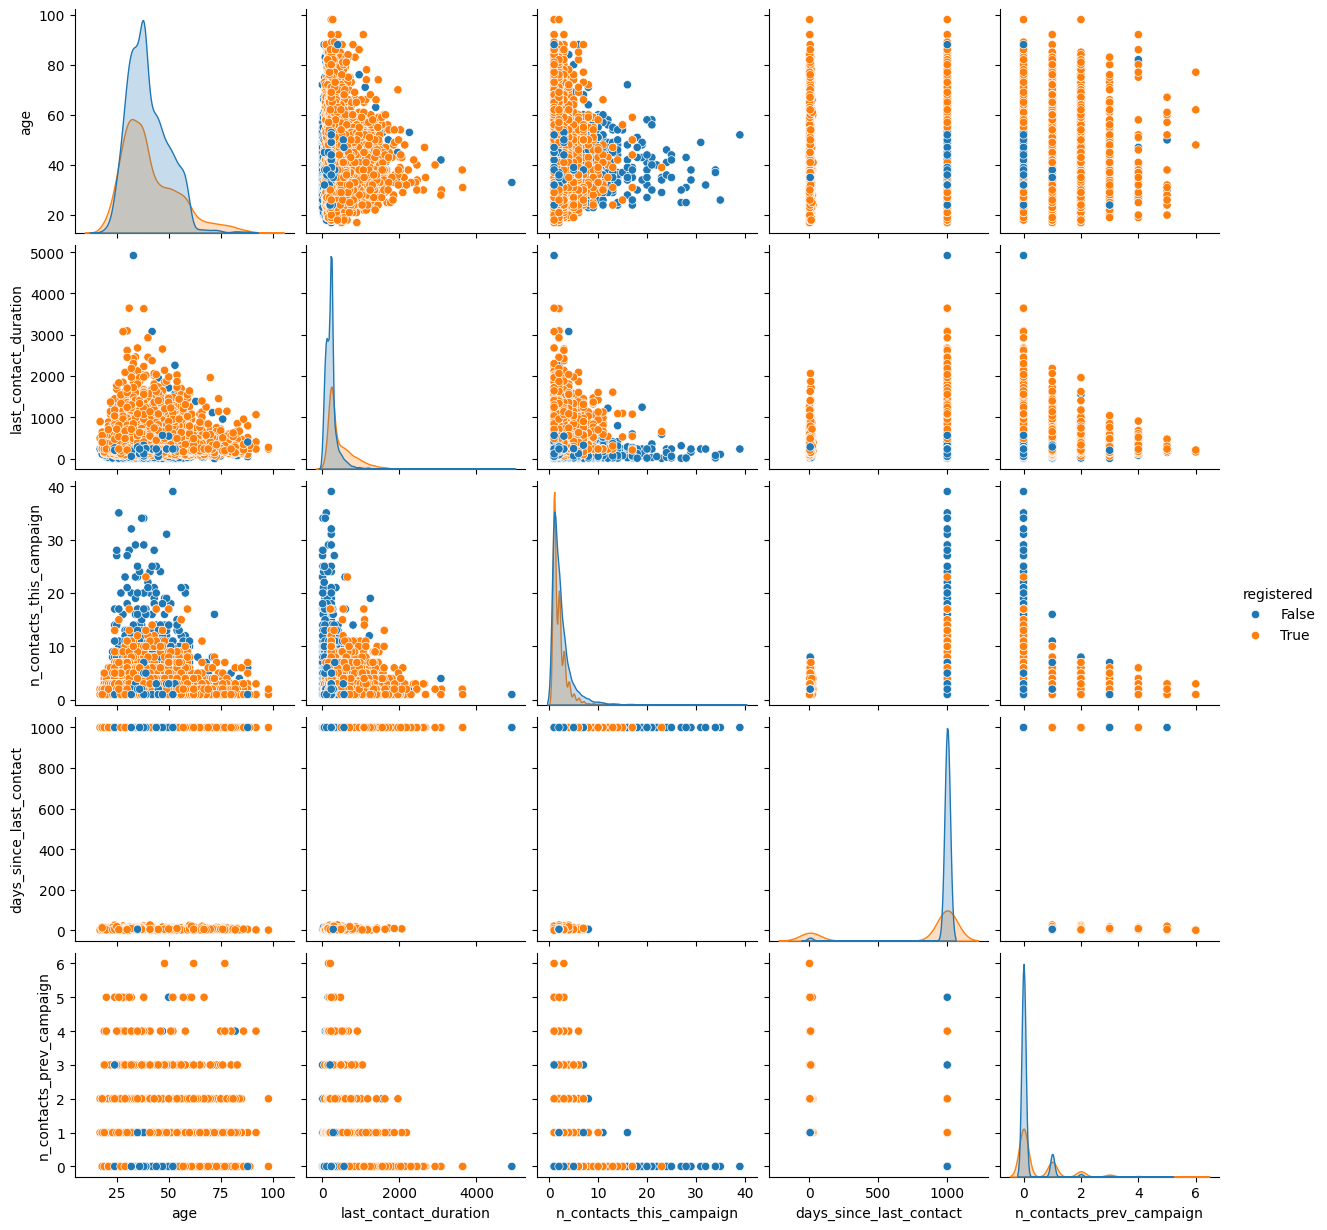

In [74]:
numerics = data.select_dtypes("number")
numerics["registered"] = registered # must be in the dataframe as numeric
sns.pairplot(numerics,hue="registered")

<Axes: >

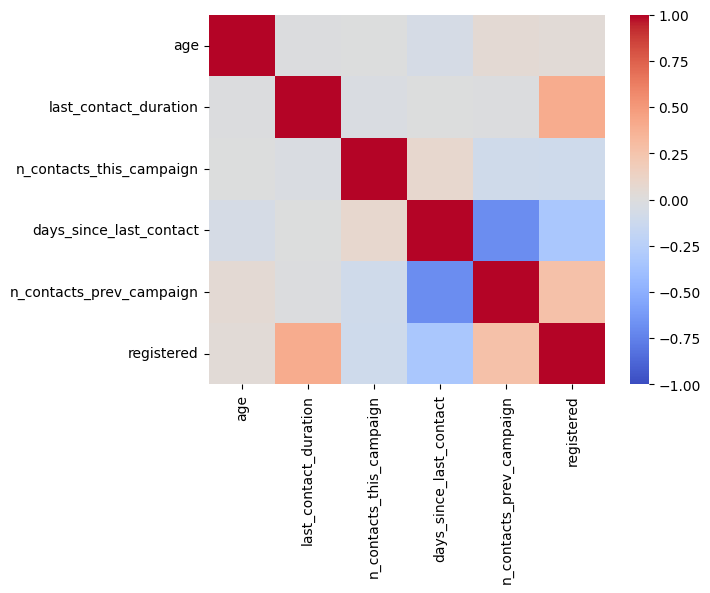

In [75]:
sns.heatmap(numerics.corr(), # the correlation matrix
            cmap="coolwarm", # my favorite colormap
            vmin=-1.0,vmax=1.0) # set the absolute extrema

In [76]:
# Findings
# no smoking gun differences in the distributions for reg/non-reg in the numerical data by histogram
# but, the correlations suggest that longer contacts and waiting less between contacts both associated
# with being registered

In [77]:
# Same analysis for non-numerics?
non_numerics = data.select_dtypes("object")

In [78]:
non_numerics.head(1).T

,0
job,student
marital,divorced
education,unknown
credit_in_default,no
housing_loan,no
personal_loan,no
last_contact_type,cellular
last_contact_month,may
last_contact_day,tue
prev_campaign_outcome,nonexistent


In [79]:
non_numerics.melt()

,variable,value
0,job,student
1,job,services
2,job,housemaid
3,job,retired
4,job,retired
...,...,...
140635,location,Funchal
140636,location,Moura
140637,location,Valongo
140638,location,Vila Nova de Santo André


In [80]:
pd.crosstab(data["registered"],data["job"],normalize="columns").T.sort_values(by="no")

registered,no,yes
job,,
student,0.298387,0.701613
retired,0.367852,0.632148
unemployed,0.536332,0.463668
admin.,0.563341,0.436659
management,0.592308,0.407692
unknown,0.601023,0.398977
technician,0.606197,0.393803
self-employed,0.610028,0.389972
entrepreneur,0.643505,0.356495


In [81]:
data["registered"].value_counts(normalize=True)

registered
no     0.602474
yes    0.397526
Name: proportion, dtype: float64

In [82]:
pd.crosstab(data["registered"],data["education"],normalize="columns").T.sort_values(by="no")

registered,no,yes
education,,
illiterate,0.428571,0.571429
university.degree,0.543808,0.456192
unknown,0.572951,0.427049
professional.course,0.589142,0.410858
high.school,0.619159,0.380841
basic.4y,0.623364,0.376636
basic.6y,0.686007,0.313993
basic.9y,0.698381,0.301619


### Findings Summary

let's summarize what we've found from our initial analysis:

No smoking gun differences in the distributions for reg/non-reg in the numerical data by histogram
but, the correlations suggest that longer contact time and waiting less between contacts both associated
with being registered.  Similarly, less blue-collar, admin, and service jobs are associated with being registered.  Surprisingly, students show a higher than baseline ratio of being registered while those with higher degrees are also, as might be expected.

### How did this work
1) read in data and adjusted reading to get tabular data
2) check out nulls and types (maybe duplicates)
3) look at distributions of numerics and categoricals separate
4) impute (you'll have to make decisions).  Good options are mean/median for numerics, catch-all's for categoricals (like unknown).  You can try more sophisticated tricks like empirical sampling etc.
5) Visualize distributions broken down by variable of interest

### Saving the data

Now that we have spent the time cleaning and exploring this dataset. We are going to save it down to file for now. In a short while, we will be using our cleaned dataset to carry out some modeling work to learn more about the customer characteristics which drive product registration! To be continued.... 

In [83]:
data.isna().sum()

age                         0
job                         0
marital                     0
education                   0
credit_in_default           0
housing_loan                0
personal_loan               0
last_contact_type           0
last_contact_month          0
last_contact_day            0
last_contact_duration       0
n_contacts_this_campaign    0
days_since_last_contact     0
n_contacts_prev_campaign    0
prev_campaign_outcome       0
registered                  0
location                    0
dtype: int64

In [84]:
data.to_csv("My_clean_output.csv")